利用Swap_test算法进行向量之间距离计算的一个简单实例<p>$a=\left[\begin{array}{ll}{6} & {8}\end{array}\right]^{T} \quad b=\left[\begin{array}{ll}{1} & {0}\end{array}\right]^{T}$<p>$Z=|a|^{2}+|b|^{2}=101$<p>$|a\rangle=\frac{6}{10}|0\rangle+\frac{8}{10}|1\rangle \qquad|b\rangle= 1|0\rangle+ 0|1\rangle$<p>变量desired_vector1表示的是量子态$|\psi\rangle=\frac{1}{\sqrt{2}}(|0, a\rangle+|1, b\rangle)$<p>变量desired_vector2表示的是量子态$|\phi\rangle=\frac{1}{\sqrt{Z}}(|a||0\rangle-|b \| 1\rangle)$<p>$\langle\phi | \psi\rangle=\frac{1}{\sqrt{2 Z}}(|a||a\rangle-|b||b\rangle)$<p>
$|\langle\phi | \psi\rangle|^{2}=\frac{1}{2 Z}|a-b|^{2}$<p>$P(|0\rangle)=\frac{1}{2}+\frac{1}{2}|\langle\phi | \psi\rangle|^{2}$<p>
$P(|1\rangle)=\frac{1}{2}-\frac{1}{2}|\langle\phi | \psi\rangle|^{2}$

In [1]:
# 导入相应的运算库
import numpy as np
from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer

In [2]:
desired_vector1 = [6/np.sqrt(200), 8/np.sqrt(200), 1/np.sqrt(2), 0]
desired_vector2 = [10/np.sqrt(101), -1/np.sqrt(101)]

In [3]:
q0 = QuantumRegister(1,'q0')
c0 = ClassicalRegister(1,'c0')

q1 = QuantumRegister(2,'q1')
c1 = ClassicalRegister(2,'c1')

q2 = QuantumRegister(1,'q2')
c2 = ClassicalRegister(1,'c2')

Circuit = QuantumCircuit()
Circuit.add_register(q0,c0)
Circuit.add_register(q1,c1)
Circuit.add_register(q2,c2)

Circuit.initialize(desired_vector1, [q1[0],q1[1]])
Circuit.initialize(desired_vector2, [q2[0]])

In [4]:
Circuit.h(q0[0])
Circuit.ccx(q0[0],q1[1],q2[0])
Circuit.ccx(q0[0],q2[0],q1[1])
Circuit.ccx(q0[0],q1[1],q2[0])
Circuit.h(q0[0])

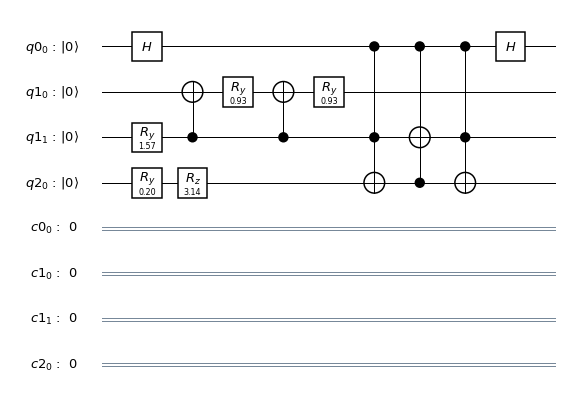

In [5]:
Circuit.draw(output='mpl')

In [6]:
# 对寄存器q0进行测量
Circuit.measure(q0,c0)

In [7]:
# 测量次数设置为10000次
backend = BasicAer.get_backend('qasm_simulator')
job = execute(Circuit, backend,shots=1024)
job.result().get_counts(Circuit)

{'0 00 1': 287, '0 00 0': 737}

In [8]:
P_0 = 0.5-89/202*0.5
P_1 = 0.5+89/202*0.5
Times_0 = P_0*1024
Times_1 = P_1*1024
print('进行测量之后，辅助量子比特为0态的次数是',Times_0)
print('进行测量之后，辅助量子比特为1态的次数是',Times_1)

进行测量之后，辅助量子比特为0态的次数是 286.41584158415844
进行测量之后，辅助量子比特为1态的次数是 737.5841584158416
